## Dynamics Learning and Localization (DLL) with 2 mass spring systems 


Primary system is the Observer and the second system is the feaeture. The derivation for the dynamics of both systems is as follows...

Newton's second law for the classical mass spring damper system.

$m\ddot{x} = - c\dot{x} - kx$

We make the substitution

$\dot{x} = v$

and write system in state space form,

$\dot{x} = v\\
\dot{v} = - \frac{c}{m}v - \frac{k}{m}x.$

In this case we neglect damping, meaning that

$c = 0$

resulting in the final system in state space form,

$\dot{x} = v\\
\dot{v} =  - \frac{k}{m}x.$

The systems are configured as...

In [2]:
from IPython.display import Image
Image(url= "./images/Picture1.jpg", width=750, height=400)

DLL is applied here following the derivation found in https://www.overleaf.com/project/5e5193431d431400019489a1 using the optimization functions...

In [3]:
Image(url= "./images/costfunction.jpg", width=750, height=300)

In [31]:
import numpy as np
import pysindy as ps
import scipy as sp

from scipy.integrate import odeint
from scipy.io import loadmat
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow

### Initialization

In [8]:
dt = .1 #integtration time step
t = np.arange(0, 100, dt) #integration length

param_1 = 1 #Observer parameter k/m
param_2 = 1 #Feature parameter k/m

x_0 = [1, 0]  # Observer Initial Conditions [x1,x2]
x_3 = 0 #second spatial dimension used to calculate distance between observer and feature

y_0 = [-1, 0] # Observer Initial Conditions
y_3 = 1 # distance from observer

def observer(x, t): #Observer System
    return [
        x[1], #x_1 dot
        -param_1*x[0]] #x_2 dot

def feature(y, t): #Feature System
    return [
        y[1], #y1 dot
        -param_2*y[0]] #y2 dot

x = odeint(observer, x_0, t) # Generate measurement data in form [x1, x2]
y = odeint(feature, y_0, t) # Generate measurement data in form [y1, y2]



array([[-1.        ,  0.        ],
       [-0.99500417,  0.0998334 ],
       [-0.98006658,  0.19866932],
       ...,
       [-0.67416391, -0.73858386],
       [-0.74453125, -0.66758994],
       [-0.80745948, -0.58992567]])

### System Trajectories

Text(0.5, 1.0, 'X-Y Trajectories')

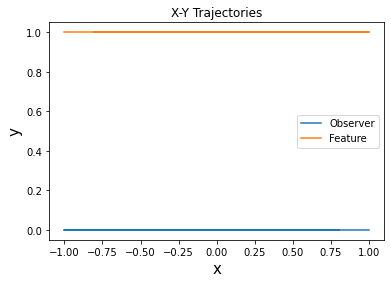

In [25]:
plt.plot(x[:,0],x_3*np.ones(x.shape[0]), label = 'Observer')
plt.plot(y[:,0],y_3*np.ones(y.shape[0]), label = 'Feature')
plt.legend()
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title('X-Y Trajectories')

### Sytem Dynamics

<ipython-input-30-22ac26fdb033>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
<ipython-input-30-22ac26fdb033>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


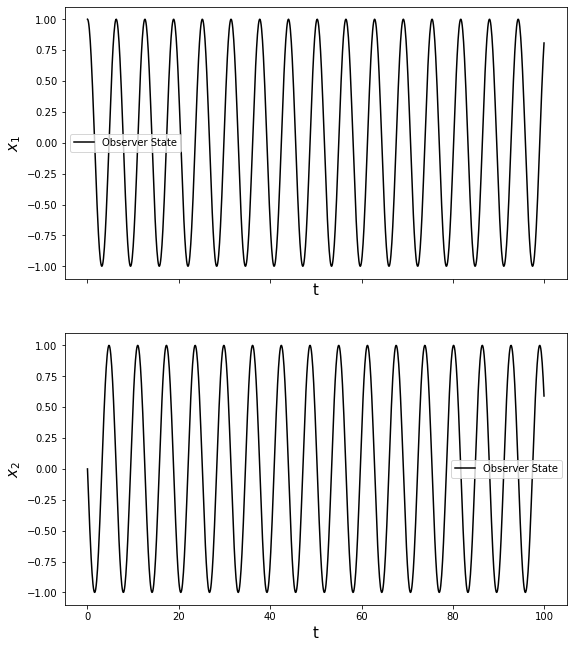

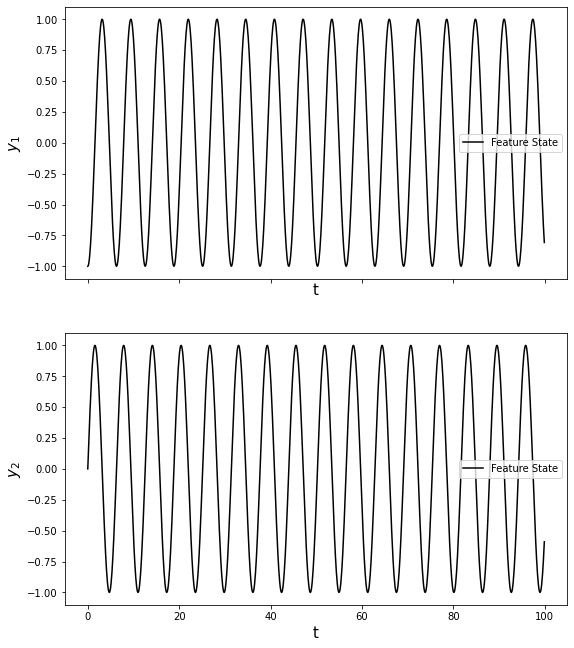

In [30]:
fig1, axs = plt.subplots(x.shape[1], 1, sharex=True, figsize=(9, 11))
for i in range(x.shape[1]):
    axs[i].plot(t, x[:, i], 'k', label='Observer State')
    #axs[i].plot(t_test, x_test_sim[:, i], 'r--', label='model simulation')
    axs[i].legend()
    #axs[i].set(xlabel='t', ylabel='$x_{}$'.format(i+1))
    axs[i].set_xlabel('t', fontsize = 15)
    axs[i].set_ylabel('$x_{}$'.format(i+1), fontsize = 15)
fig1.show()

fig2, axs = plt.subplots(y.shape[1], 1, sharex=True, figsize=(9, 11))
for i in range(y.shape[1]):
    axs[i].plot(t, y[:, i], 'k', label='Feature State')
    #axs[i].plot(t_test, x_test_sim[:, i], 'r--', label='model simulation')
    axs[i].legend()
    #axs[i].set(xlabel='t', ylabel='$x_{}$'.format(i+1))
    axs[i].set_xlabel('t', fontsize = 15)
    axs[i].set_ylabel('$y_{}$'.format(i+1), fontsize = 15)
fig2.show()

### Simulated Sensors

## DLL Optimization

In [ ]:
for i=t
    sp.optimize.minimize()

    Sindy